In [1]:
from pyspark.sql import SparkSession

# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName("MAST30034 Project 1")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC") # fix timestamps loaded by spark
    .getOrCreate()
)

your 131072x1 screen size is bogus. expect trouble
23/08/19 15:07:45 WARN Utils: Your hostname, DESKTOP-SATV84A resolves to a loopback address: 127.0.1.1; using 172.26.254.29 instead (on interface eth0)
23/08/19 15:07:45 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/08/19 15:07:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/08/19 15:07:47 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/08/19 15:07:47 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


# NULL value imputation

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

#df = spark.read.parquet('../data/curated/combined.parquet')

df = pd.read_parquet('../data/curated/combined.parquet')

In [4]:
df.loc[:, df.isna().any()]

,total_pop,avg_income_per_cap,poverty_%,professional_%,service_%,office_%,construction_%,production_%,drive_%,carpool_%,transit_%,walk_%,work_at_home_%,avg_commute_mins,private_work_%,public_work_%,self_employed_%,unemployment_%
0,19408.0,170575.666667,4.733333,76.816667,3.350000,18.333333,0.750000,0.750000,12.183333,2.250000,30.750000,30.700000,12.916667,23.150000,82.266667,5.333333,11.450000,3.450000
1,19408.0,170575.666667,4.733333,76.816667,3.350000,18.333333,0.750000,0.750000,12.183333,2.250000,30.750000,30.700000,12.916667,23.150000,82.266667,5.333333,11.450000,3.450000
2,19408.0,170575.666667,4.733333,76.816667,3.350000,18.333333,0.750000,0.750000,12.183333,2.250000,30.750000,30.700000,12.916667,23.150000,82.266667,5.333333,11.450000,3.450000
3,1404.0,95716.250000,6.025000,64.925000,18.075000,10.275000,5.400000,1.300000,4.250000,0.000000,21.975000,52.850000,12.875000,40.250000,87.650000,2.925000,9.425000,2.575000
4,1404.0,95716.250000,6.025000,64.925000,18.075000,10.275000,5.400000,1.300000,4.250000,0.000000,21.975000,52.850000,12.875000,40.250000,87.650000,2.925000,9.425000,2.575000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332622,6095.0,48213.666667,9.366667,60.966667,9.333333,19.633333,4.000000,6.100000,8.133333,1.733333,71.466667,7.200000,8.100000,35.833333,80.766667,8.900000,10.333333,5.333333
332623,23839.0,79279.666667,10.266667,74.033333,5.750000,16.833333,2.150000,1.233333,4.883333,1.583333,70.400000,9.916667,9.033333,31.216667,80.933333,9.516667,9.466667,5.250000
332624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332625,73125.0,22654.052632,32.415789,36.973684,23.915789,27.026316,4.078947,8.015789,11.968421,3.210526,62.231579,13.836842,3.610526,38.515789,79.942105,15.352632,4.642105,14.326316


In [6]:
NON_CENSUS_COLS = ['number_of_airbnb_here', 'avg_daily_airbnb_price_usd', 'number_of_hotels_here', 'number_of_parking_munimeters_here', 'number_of_subway_stations_here']

# reasonable to assume that there are a low amount / truly zero of these things in the zones with NULL values so should be fine to replace with 0

df[NON_CENSUS_COLS] = df[NON_CENSUS_COLS].fillna(0)


In [7]:
df.iloc[:, 18:]

,total_pop,avg_income_per_cap,poverty_%,professional_%,service_%,office_%,construction_%,production_%,drive_%,carpool_%,transit_%,walk_%,work_at_home_%,avg_commute_mins,private_work_%,public_work_%,self_employed_%,unemployment_%
0,19408.0,170575.666667,4.733333,76.816667,3.350000,18.333333,0.750000,0.750000,12.183333,2.250000,30.750000,30.700000,12.916667,23.150000,82.266667,5.333333,11.450000,3.450000
1,19408.0,170575.666667,4.733333,76.816667,3.350000,18.333333,0.750000,0.750000,12.183333,2.250000,30.750000,30.700000,12.916667,23.150000,82.266667,5.333333,11.450000,3.450000
2,19408.0,170575.666667,4.733333,76.816667,3.350000,18.333333,0.750000,0.750000,12.183333,2.250000,30.750000,30.700000,12.916667,23.150000,82.266667,5.333333,11.450000,3.450000
3,1404.0,95716.250000,6.025000,64.925000,18.075000,10.275000,5.400000,1.300000,4.250000,0.000000,21.975000,52.850000,12.875000,40.250000,87.650000,2.925000,9.425000,2.575000
4,1404.0,95716.250000,6.025000,64.925000,18.075000,10.275000,5.400000,1.300000,4.250000,0.000000,21.975000,52.850000,12.875000,40.250000,87.650000,2.925000,9.425000,2.575000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332622,6095.0,48213.666667,9.366667,60.966667,9.333333,19.633333,4.000000,6.100000,8.133333,1.733333,71.466667,7.200000,8.100000,35.833333,80.766667,8.900000,10.333333,5.333333
332623,23839.0,79279.666667,10.266667,74.033333,5.750000,16.833333,2.150000,1.233333,4.883333,1.583333,70.400000,9.916667,9.033333,31.216667,80.933333,9.516667,9.466667,5.250000
332624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332625,73125.0,22654.052632,32.415789,36.973684,23.915789,27.026316,4.078947,8.015789,11.968421,3.210526,62.231579,13.836842,3.610526,38.515789,79.942105,15.352632,4.642105,14.326316


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'poverty_%'),
  Text(1, 0, 'professional_%'),
  Text(2, 0, 'service_%'),
  Text(3, 0, 'office_%'),
  Text(4, 0, 'construction_%'),
  Text(5, 0, 'production_%'),
  Text(6, 0, 'drive_%'),
  Text(7, 0, 'carpool_%'),
  Text(8, 0, 'transit_%'),
  Text(9, 0, 'walk_%'),
  Text(10, 0, 'work_at_home_%'),
  Text(11, 0, 'avg_commute_mins'),
  Text(12, 0, 'private_work_%'),
  Text(13, 0, 'public_work_%'),
  Text(14, 0, 'self_employed_%'),
  Text(15, 0, 'unemployment_%')])

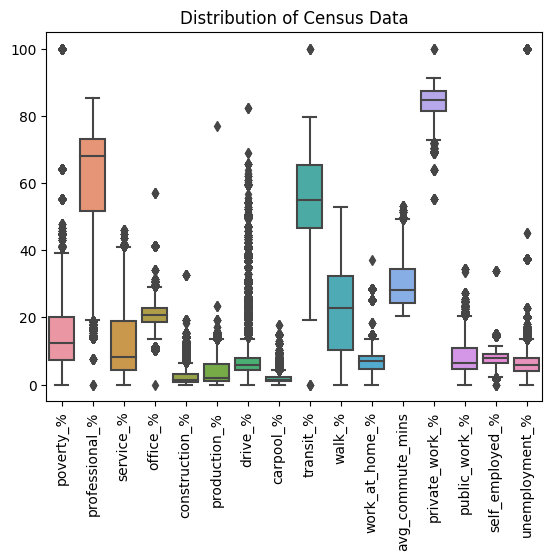

In [15]:
NON_PERCENT_COLS = ['number_of_airbnb_here', 'avg_daily_airbnb_price_usd', 'number_of_hotels_here', 'number_of_parking_munimeters_here', 'number_of_subway_stations_here', 'avg_income_per_cap', 'total_pop']

# plot the distributions of percentage attributes of census data 

boxplot = sns.boxplot(data=df.iloc[:, 20:]).set(title='Distribution of Census Data')

plt.xticks(rotation=90)

#boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90)

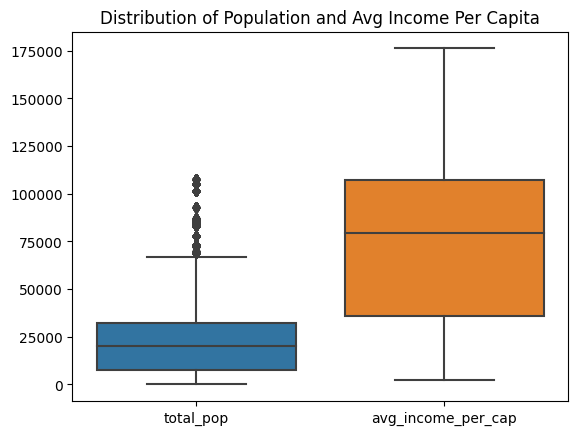

In [19]:
# plot the distributions of percentage attributes of census data 

boxplot = sns.boxplot(data=df.iloc[:, [18,19]]).set(title='Distribution of Population and Avg Income Per Capita')

In [29]:
# the census attributes have several outliers so median imputation will likely perform better than mean imputation here, however, do not
df.iloc[:, 18:] = df.iloc[:, 18:].fillna(df.median())

# note that this will introduce some bias into the data, however the spread of most of the census attributes is relatively tight so shouldn't be too bad

In [30]:
# check that NULL values have been handled

df.loc[:, df.isna().any()]

""
0
1
2
3
4
...
332622
332623
332624
332625


In [31]:
df.to_parquet('../data/curated/combined_imputed.parquet')